In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
user_df = pd.read_csv("C:\\Users\\kasun\\Downloads\\yelp\\data\\yelp_academic_dataset_user_preprocessed.csv")

In [3]:
user_df

,num,user_id,name,review_count,useful,funny,cool,fans,average_stars,compliment_hot,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_years,is_elite,years_on_platform
0,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,7217,1259,5994,267,3.91,250,...,18,232,844,467,467,239,180,1,1,16
1,1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,43091,13066,27281,3138,3.74,1145,...,251,1847,7054,3131,3131,1521,1946,14,1,14
2,2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2086,1010,1003,52,3.32,89,...,3,66,96,119,119,35,18,5,1,15
3,3,SZDeASXq7o05mMNLshsdIA,Gwen,224,512,330,299,28,4.27,24,...,2,12,16,26,26,10,9,3,1,18
4,4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,29,15,7,1,3.54,1,...,0,1,1,0,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,7,0,0,0,4.92,0,...,0,0,0,0,0,0,0,0,0,8
1987893,1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,0,0,0,0,5.00,0,...,0,0,0,0,0,0,0,0,0,7
1987894,1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,1,1,0,0,2.00,0,...,0,0,0,0,0,0,0,0,0,6
1987895,1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,0,0,0,0,3.00,0,...,0,0,0,0,0,0,0,0,0,12


In [4]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   num                 int64  
 1   user_id             object 
 2   name                object 
 3   review_count        int64  
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   fans                int64  
 8   average_stars       float64
 9   compliment_hot      int64  
 10  compliment_more     int64  
 11  compliment_profile  int64  
 12  compliment_cute     int64  
 13  compliment_list     int64  
 14  compliment_note     int64  
 15  compliment_plain    int64  
 16  compliment_cool     int64  
 17  compliment_funny    int64  
 18  compliment_writer   int64  
 19  compliment_photos   int64  
 20  elite_years         int64  
 21  is_elite            int64  
 22  years_on_platform   int64  
dtypes: float64(1), int64(20), object(2)
memory usage: 348.8+ 

In [5]:
user_df.describe()

,num,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_years,is_elite,years_on_platform
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,...,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,9.939480e+05,2.339441e+01,4.229634e+01,1.697054e+01,2.379291e+01,1.465740e+00,3.630494e+00,1.807072e+00,2.922631e-01,1.793176e-01,...,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00,1.914063e-01,4.587662e-02,8.652421e+00
std,5.738566e+05,8.256699e+01,6.414806e+02,4.078034e+02,5.653513e+02,1.813075e+01,1.183337e+00,7.360184e+01,1.282467e+01,1.515525e+01,...,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01,1.054780e+00,2.092175e-01,3.111929e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.969740e+05,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
50%,9.939480e+05,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
75%,1.490922e+06,1.700000e+01,1.300000e+01,2.000000e+00,3.000000e+00,0.000000e+00,4.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01
max,1.987896e+06,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,...,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04,1.700000e+01,1.000000e+00,1.900000e+01


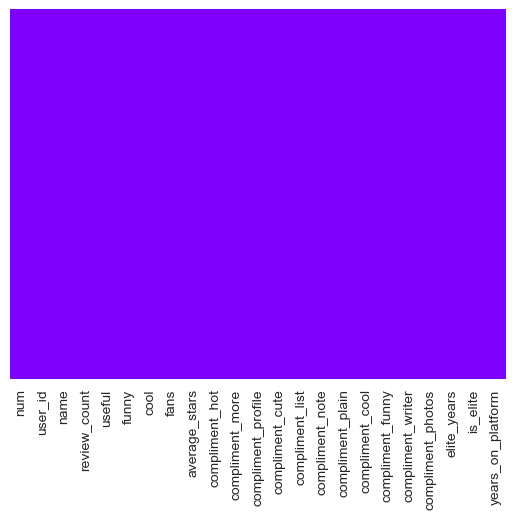

In [6]:
sns.heatmap(user_df.isnull(), yticklabels = False, cbar = False, cmap="rainbow")
plt.show()

In [7]:
user_df.isnull().sum()

num                    0
user_id                0
name                  37
review_count           0
useful                 0
funny                  0
cool                   0
fans                   0
average_stars          0
compliment_hot         0
compliment_more        0
compliment_profile     0
compliment_cute        0
compliment_list        0
compliment_note        0
compliment_plain       0
compliment_cool        0
compliment_funny       0
compliment_writer      0
compliment_photos      0
elite_years            0
is_elite               0
years_on_platform      0
dtype: int64

In [8]:
#check for duplicate rows
user_df.duplicated().sum()

0

In [12]:
user_df.drop(['user_id','num','name'], axis = 1, inplace = True)


C:\Users\kasun\AppData\Local\Temp\ipykernel_10216\2581417371.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_df[user_df.columns[i]], kde_kws={"color": "r", "lw": 1, "label": "KDE"}, hist_kws={"color": "g"})
C:\Users\kasun\AppData\Local\Temp\ipykernel_10216\2581417371.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

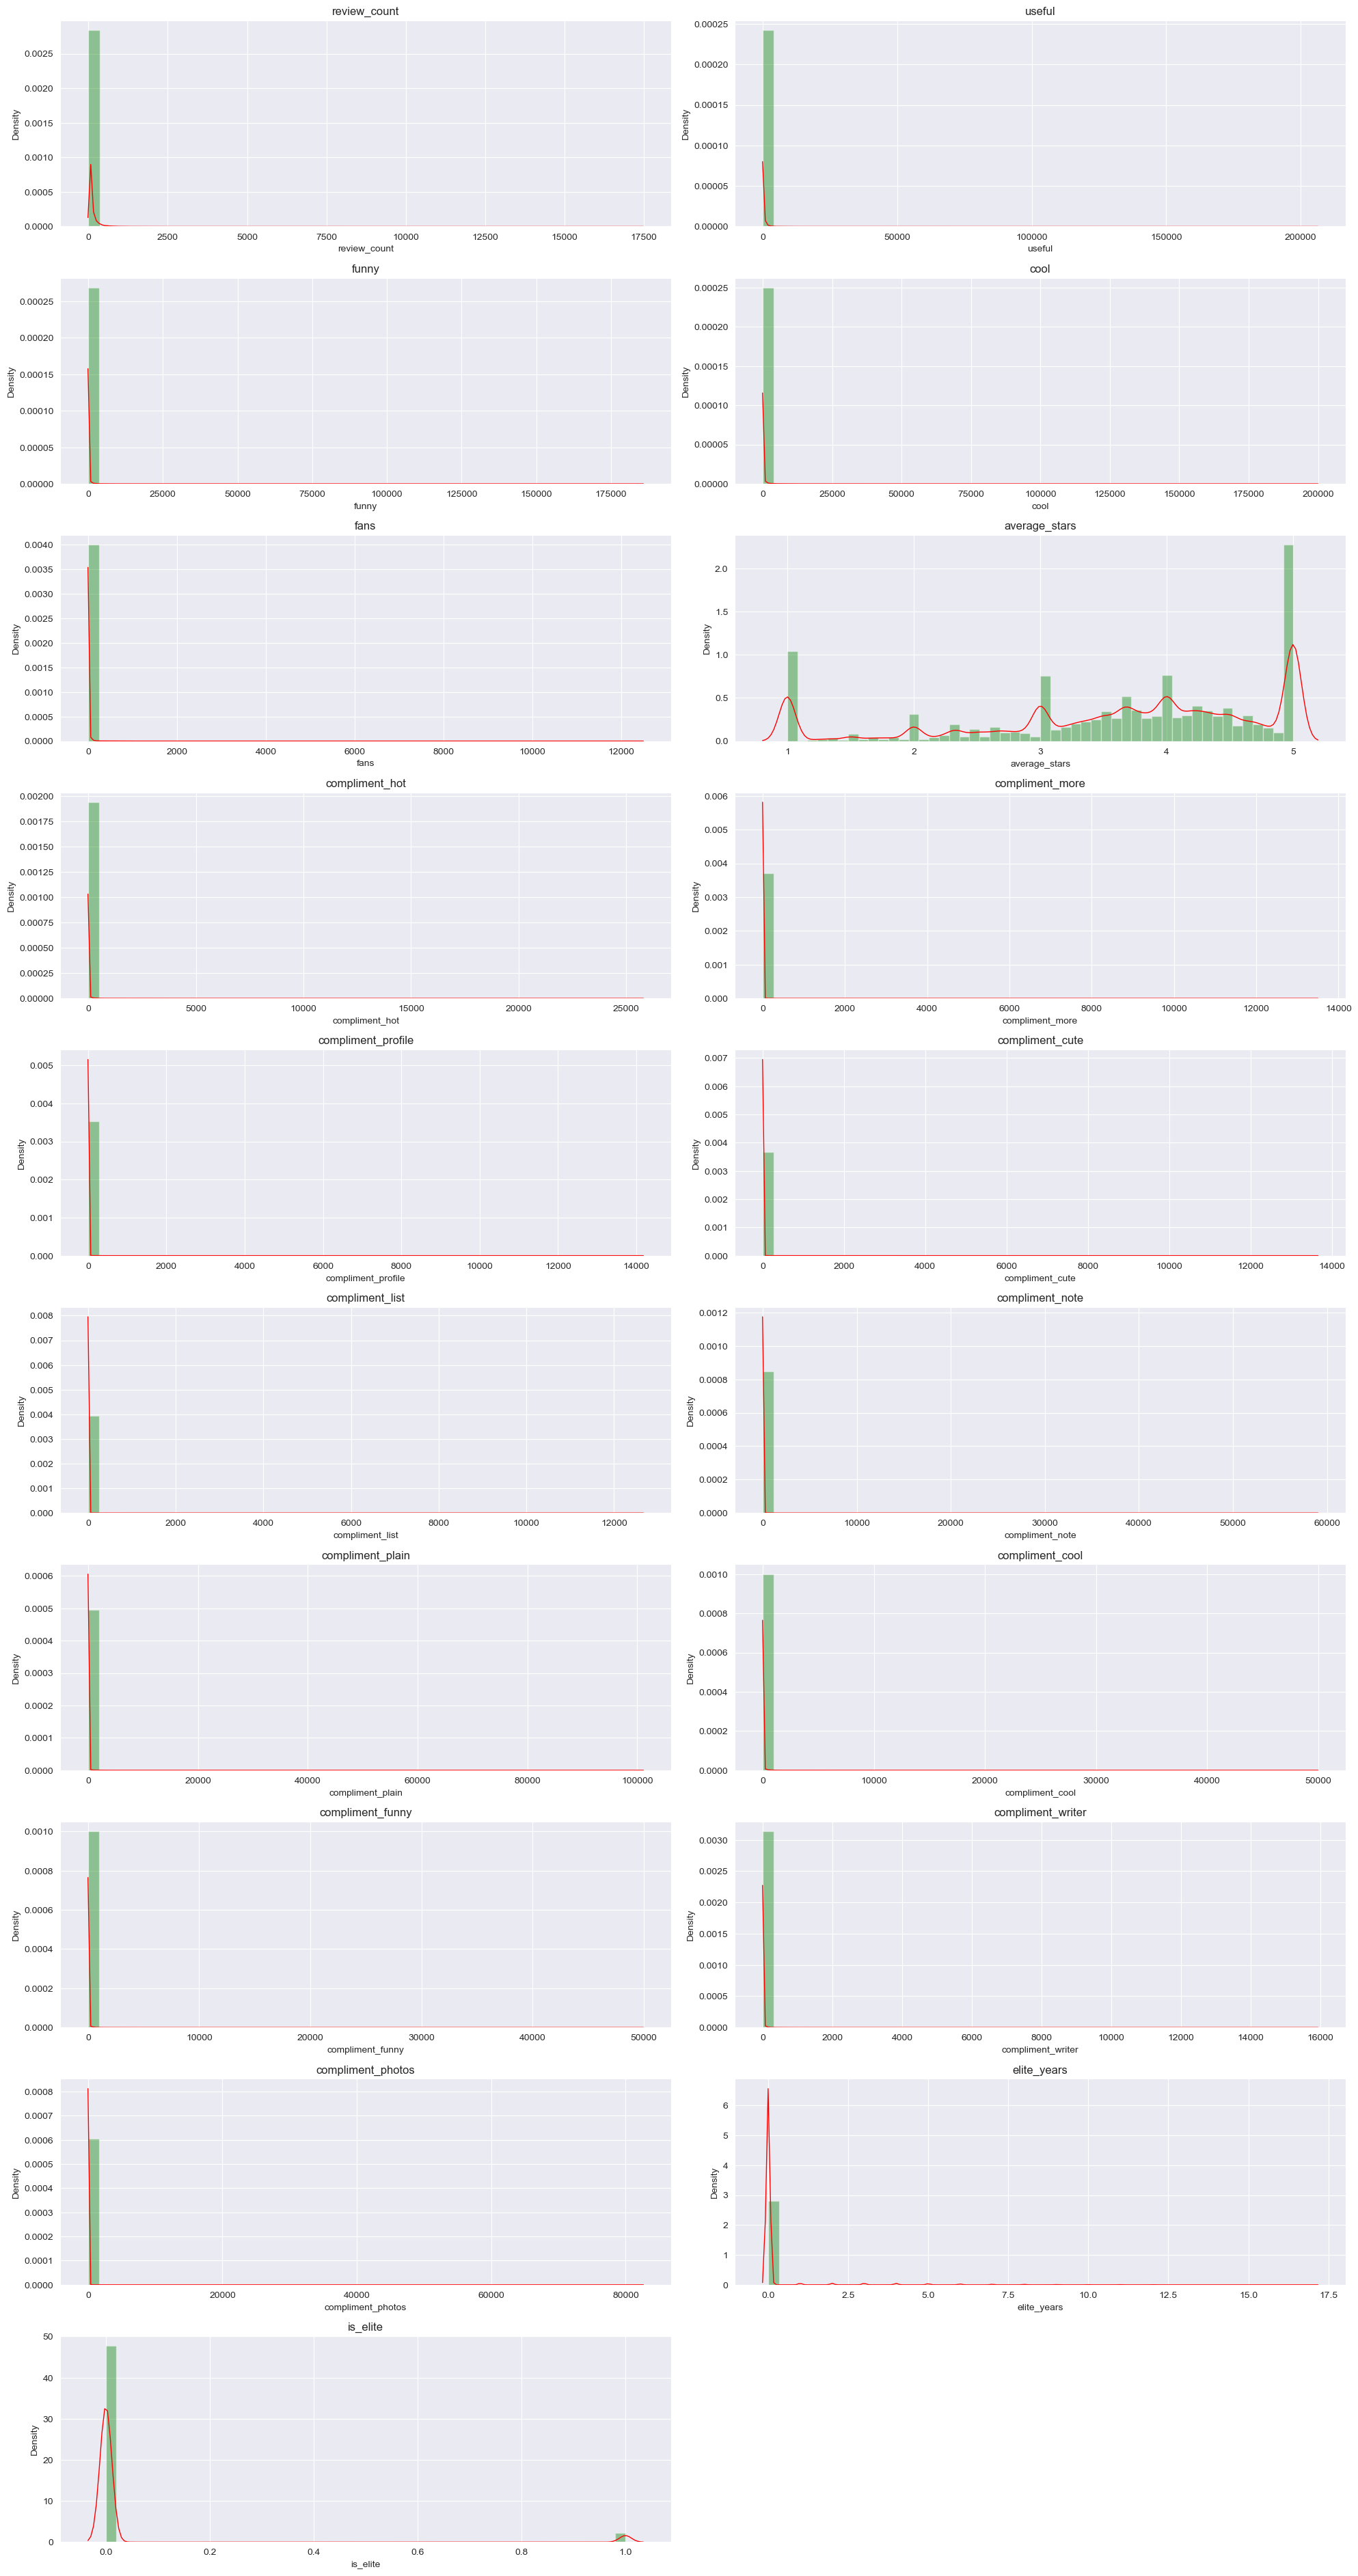

In [13]:
plt.figure(figsize=(20,60))
for i in range(len(user_df.columns)-1):
  plt.subplot(16, 2, i+1)
  sns.distplot(user_df[user_df.columns[i]], kde_kws={"color": "r", "lw": 1}, hist_kws={"color": "g"})
  plt.title(user_df.columns[i])

plt.tight_layout()

In [14]:
correlations = user_df.corr()

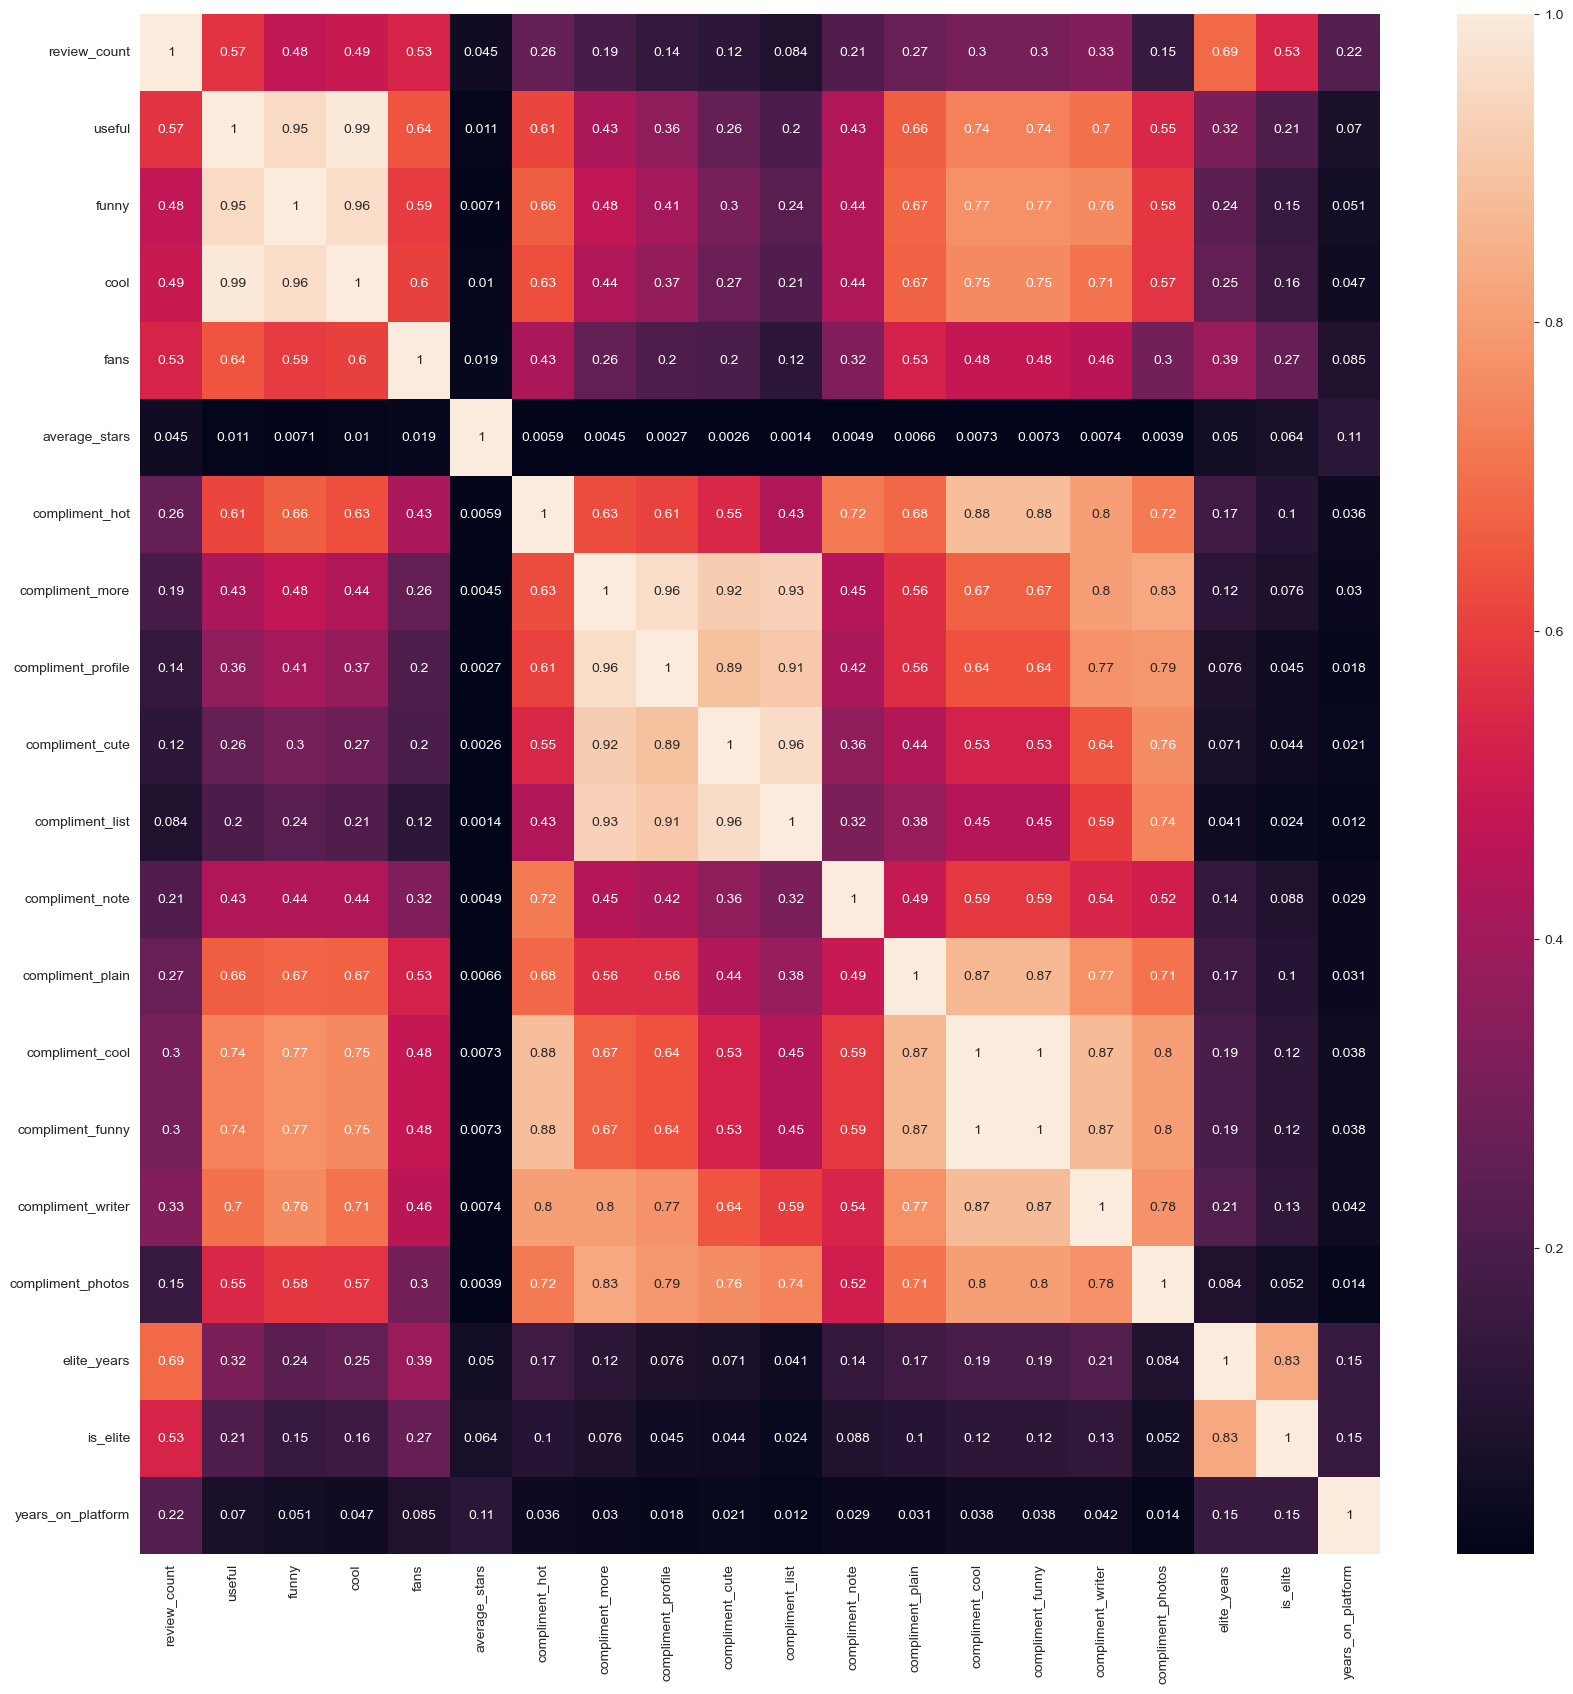

In [15]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
plt.show()